# Four-Coordinate Paper (FCP) PV Plot Demo

This notebook demonstrates how to use the `four_quadrant_plotting` package to format a Matplotlib figure for four-quadrant pseudo-velocity shock plots.

What you'll see:
- Log–log PV axes with Frequency (Hz)
- Optional top Period (s) axis (via Matplotlib's secondary_xaxis)
- Oblique reference lines with labels: acceleration in `g`, displacement in `m` (for m/s) or `in` (for in/s)
- SI and Imperial examples

Note: This package only formats/annotates the plot; it does not compute SRS or PV.


In [1]:
# Setup: import package from local src and configure plotting
import sys, pathlib
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Make sure the local package is importable without installing
repo_root = pathlib.Path.cwd()
# Walk up until we find the project's src package
for _ in range(5):
    if (repo_root / 'src' / 'fcp_plotting').exists():
        break
    if repo_root.parent == repo_root:
        break
    repo_root = repo_root.parent
src_path = repo_root / 'src'
if src_path.exists() and str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

from fcp_plotting import fcp

%matplotlib inline


## Generate synthetic PV data
We'll synthesize a pseudo-velocity curve for demonstration. Replace this with your own PV data as needed.


In [2]:
# Frequency range (Hz)
f = np.logspace(0, 3, 500)  # 1 .. 1000 Hz

# Toy PV curve in m/s: combination of inverse and proportional components
pv_ms = 0.6/(2*pi*f) + 0.0025*(2*pi*f)

# Convert to in/s for Imperial example (1 m = 39.37007874 in)
pv_ips = pv_ms * 39.37007874015748
f[:5], pv_ms[:5], pv_ips[:5]


(array([1.        , 1.01393946, 1.02807322, 1.04240401, 1.05693455]),
 array([0.11120093, 0.11010707, 0.10903431, 0.10798245, 0.10695128]),
 array([4.37798934, 4.33492399, 4.29268939, 4.25127742, 4.21068015]))

## SI example (m/s, g labels, m displacement)


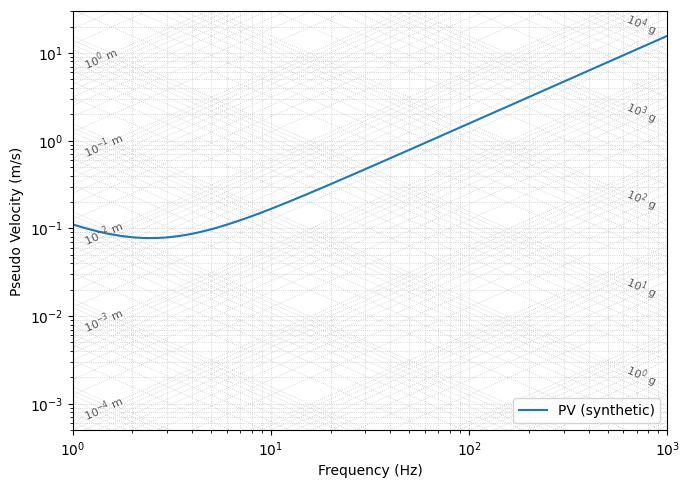

In [3]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlim(1, 1000)
ax.set_ylim(5e-4, 30)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Pseudo Velocity (m/s)')
fcp(ax, v_unit='m/s')
ax.grid(True, which='both', ls=':', lw=0.6, color='0.8')
ax.loglog(f, pv_ms, color='C0', label='PV (synthetic)')
ax.legend()
fig.tight_layout()
plt.show()


## Imperial example (in/s, g labels, in displacement)


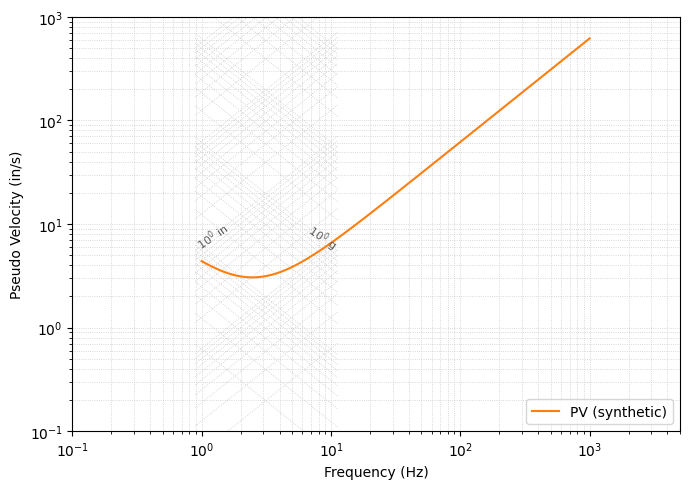

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
# Set axis limits first, then call fcp()
ax.set_xlim(0.1, 5000)
ax.set_ylim(0.1, 1000)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Pseudo Velocity (in/s)')
fcp(ax, v_unit='in/s')  # Call after setting limits
ax.grid(True, which='both', ls=':', lw=0.6, color='0.8')
ax.loglog(f, pv_ips, color='C1', label='PV (synthetic)')
ax.legend()
fig.tight_layout()
plt.show()

## Two PV curves (styling example)
Demonstrates plotting multiple PV curves and basic Matplotlib styling. Diagonals are fixed (1–9 within each decade); only decades are labeled.


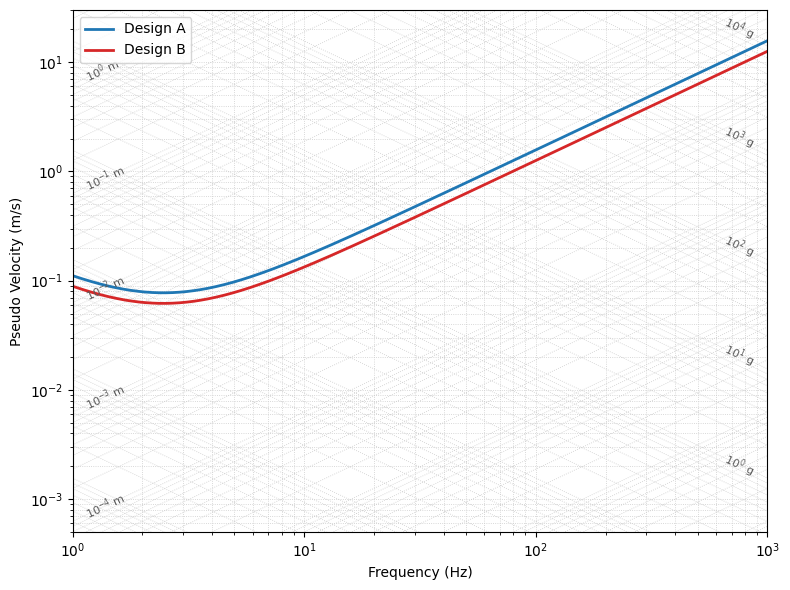

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(1, 1000)
ax.set_ylim(5e-4, 30)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Pseudo Velocity (m/s)')
fcp(ax, v_unit='m/s')
ax.grid(True, which='both', ls=':', lw=0.6, color='0.8')
ax.loglog(f, pv_ms, color='C0', lw=2.0, label='Design A')
ax.loglog(f, pv_ms*0.8, color='C3', lw=2.0, label='Design B')
ax.legend()
fig.tight_layout()
plt.show()


## Optional: Download PV data from a URL
If you have a public CSV with Frequency and PV columns, you can set `url` below. The CSV should have two columns: frequency (Hz) and pseudo velocity (in your chosen unit). The code uses Python's standard library to fetch the file.

This cell is optional and will be skipped if `url` is empty.


In [6]:
import io, urllib.request, csv

# Set the unit of the downloaded PV data ('m/s' or 'in/s')
v_unit_dl = 'm/s'

url = ''  # Paste a CSV URL here, or leave blank to skip
downloaded = False
if url:
    try:
        with urllib.request.urlopen(url, timeout=15) as resp:
            text = resp.read().decode('utf-8', errors='ignore')
        rows = list(csv.reader(io.StringIO(text)))
        # Attempt to detect header and parse numeric columns
        # Expect columns: frequency_hz, pv (unit)
        # Skip empty/comment rows
        data = []
        for r in rows:
            if not r or r[0].strip().startswith('#'):
                continue
            try:
                fx = float(r[0])
                pvx = float(r[1])
                data.append((fx, pvx))
            except Exception:
                # likely a header row or malformed; ignore
                continue
        if len(data) >= 5:
            data = sorted(data)
            f_dl = np.array([d[0] for d in data], dtype=float)
            pv_dl = np.array([d[1] for d in data], dtype=float)
            downloaded = True
            print(f'Downloaded {len(data)} rows.')
        else:
            print('Downloaded file but could not parse numeric data columns.')
    except Exception as e:
        print('Download skipped/failed:', e)
else:
    print('No URL provided; skipping download.')


No URL provided; skipping download.


## Plot downloaded PV data (if available)


In [7]:
if 'downloaded' in globals() and downloaded:
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_xlim(max(1e-3, float(f_dl.min())*0.8), float(f_dl.max())*1.2)
    ax.set_ylim(max(1e-6, float(pv_dl[pv_dl>0].min())*0.8) if np.any(pv_dl>0) else 1e-6,
                float(max(pv_dl.max(), 1e-3))*1.2)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(f'Pseudo Velocity ({v_unit_dl})')
    fcp(ax, v_unit=v_unit_dl)
    ax.grid(True, which='both', ls=':', lw=0.6, color='0.8')
    ax.loglog(f_dl, pv_dl, color='C2', label='PV (downloaded)')
    ax.legend()
    fig.tight_layout()
    plt.show()
else:
    print('No downloaded data to plot.')


No downloaded data to plot.
